# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [61]:
x_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
x_train = pd.read_csv('X_train_balanceado.csv')
y_train = pd.read_csv('y_train_balanceado.csv')

In [ ]:
x_test.head(10)


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,38,1,125000.0,3,0,0,0
1,38,1,112500.0,4,0,2,0
2,33,0,82000.0,4,0,1,0
3,26,0,45000.0,0,1,0,1
4,31,1,67500.0,1,1,0,1
5,40,1,125000.0,3,1,0,0
6,53,1,115000.0,0,0,0,0
7,29,0,27500.0,3,1,0,1
8,45,0,110000.0,1,0,3,0
9,38,1,87500.0,4,1,0,0


In [63]:
y_test.head(10)

,Credit Score
0,1
1,1
2,1
3,0
4,0
5,1
6,1
7,2
8,1
9,1


In [64]:
x_train

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,28,0,32500.0,0,1,0,1
1,49,0,77500.0,2,0,1,0
2,25,0,60000.0,1,1,0,1
3,27,0,37500.0,3,1,0,1
4,30,1,105000.0,4,0,2,0
...,...,...,...,...,...,...,...
232,38,0,27500.0,3,1,0,1
233,38,1,100000.0,4,1,0,0
234,38,0,27500.0,3,1,0,1
235,33,1,52500.0,3,1,0,1


In [65]:
y_train

,Credit Score
0,2
1,1
2,0
3,2
4,1
...,...
232,2
233,1
234,2
235,0


In [66]:
train_balance = y_train.value_counts()
print("Balance of training set:")
print(train_balance)

test_balance = y_test.value_counts()
print("\nBalance of test set:")
print(test_balance)

Balance of training set:
Credit Score
0               79
1               79
2               79
Name: count, dtype: int64

Balance of test set:
Credit Score
1               34
0               11
2                5
Name: count, dtype: int64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [67]:
naive_credit_score = GaussianNB()
naive_credit_score.fit(x_train, y_train)

/home/renan/ebac-modulo20/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,priors,None
,var_smoothing,1e-09


# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia (treino): 0.9873417721518988
Recall (macro - treino): 0.9873417721518987


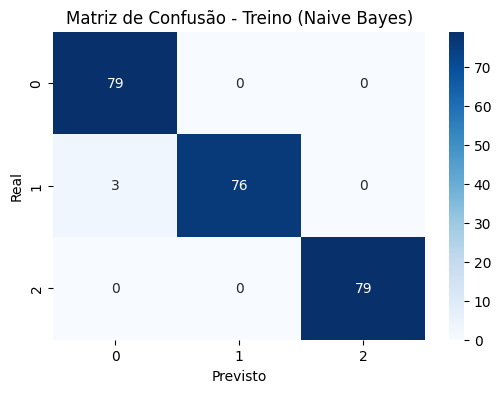

In [68]:
#Previsões no conjunto de treinamento
y_pred_train = naive_credit_score.predict(x_train)

#Acurácia
acc_train = accuracy_score(y_train, y_pred_train)
print("Acurácia (treino):", acc_train)

#Recall (macro)
recall_train = recall_score(y_train, y_pred_train, average='macro')
print("Recall (macro - treino):", recall_train)

#Matriz de Confusão
cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Treino (Naive Bayes)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()



### 📘 Insight — Avaliação do Modelo (Treinamento)

Após treinar o modelo **Gaussian Naive Bayes** no conjunto de treinamento balanceado, obtive os seguintes resultados:

---

## 🔹 Acurácia no Treino
**Acurácia:** 0.9873

A acurácia foi extremamente alta (98,7%), indicando que o modelo acerta quase todas as previsões no conjunto de treinamento.  
Como os dados de treino foram balanceados, essa métrica é confiável, pois nenhuma classe domina o conjunto.

---

## 🔹 Recall Macro no Treino
**Recall (macro):** 0.9873

O recall macro considera todas as classes com peso igual, calculando o recall individual de cada classe e tirando a média.  
O valor encontrado (98,7%) mostra que o modelo identifica muito bem todas as classes (0, 1 e 2), sem viés para nenhuma delas.

---

## 🔹 Matriz de Confusão — Treinamento

| Classe Real | Previsto 0 | Previsto 1 | Previsto 2 |
|-------------|------------|------------|------------|
| **0**       | 79         | 0          | 0          |
| **1**       | 3          | 76         | 0          |
| **2**       | 0          | 0          | 79         |

### ✔️ Interpretação:

- **Classe 0:** 79 acertos → *100% de recall*
- **Classe 1:** 76 acertos, 3 erros → *96,2% de recall*
- **Classe 2:** 79 acertos → *100% de recall*

Apenas três instâncias da classe **1** foram confundidas com a classe **0**.  
Nenhuma instância foi confundida com a classe **2**, o que mostra que o modelo separa muito bem as classes extremas (0 e 2).

---

## 🔍 Conclusão Geral

O desempenho do modelo no conjunto de treinamento é **excelente**:

- Acurácia muito alta  
- Recall macro muito alto  
- Matriz de confusão praticamente perfeita  
- Pouquíssimos erros, concentrados apenas em uma direção (classe 1 → classe 0)

Esses resultados indicam que o modelo aprendeu bem os padrões dos dados.  

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia (teste): 0.98
Recall (macro - teste): 0.9901960784313726


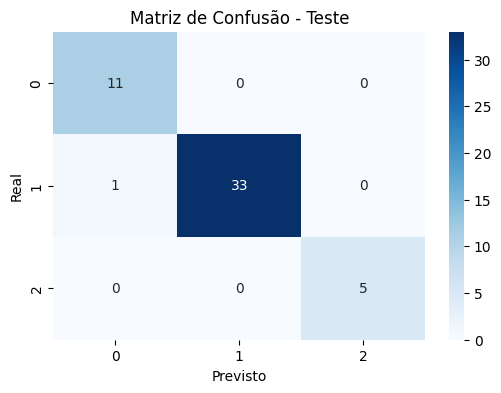

In [70]:
#Previsões no conjunto de teste
y_pred_test = naive_credit_score.predict(x_test)

#Métricas
acc_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')

print("Acurácia (teste):", acc_test)
print("Recall (macro - teste):", recall_test)

#Matriz de confusão
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()



---

## 📊 Interpretação dos Resultados

O modelo apresentou **excelente desempenho tanto nos dados de treinamento quanto nos dados de teste**, evidenciando uma ótima capacidade de generalização.

### **Comparação — Treino × Teste**
- A acurácia reduziu levemente de **0.9873** para **0.98**, o que representa uma diferença mínima.
- O recall macro aumentou de **0.9873** para **0.9902**, indicando boa capacidade de reconhecer corretamente todas as classes no conjunto de teste.
- Nas matrizes de confusão:
- O modelo **não errou nenhuma vez** para as classes **0 e 2** nos dados de teste.
- Houve apenas **1 erro** na classificação da classe **1**.
- A classe **2**, que originalmente era a mais rara, foi identificada corretamente em todos os casos.

### **Conclusão**
O modelo mostra-se consistente e robusto.  
As métricas próximas entre treino e teste demonstram ausência de overfitting.  
O comportamento equilibrado entre todas as classes reforça que o balanceamento funcionou e o modelo generaliza muito bem.

---


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

## Descrição do Projeto

Neste projeto, eu desenvolvi um modelo de classificação utilizando o algoritmo Naive Bayes para prever o credit score de clientes com base em variáveis financeiras e comportamentais. O principal objetivo foi identificar automaticamente o nível de risco de cada cliente, permitindo que instituições financeiras tomem decisões mais seguras e eficientes. Durante o processo, realizei pré-processamento, balanceamento das classes, divisão entre treino e teste e avaliação completa do desempenho do modelo. Ao final, pude analisar como o Naive Bayes se comporta nesse tipo de problema e compreender sua aplicação prática em cenários reais de concessão de crédito.
